In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv("weight_height_data.csv")

In [51]:
df.head()

,Weight,Height
0,47,122
1,60,137
2,50,125
3,63,148
4,72,162


Text(0, 0.5, 'Height')

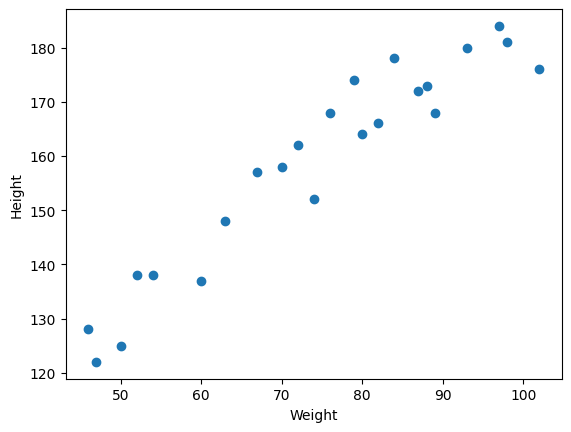

In [52]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [53]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [54]:
df.corr()

,Weight,Height
Weight,1.000000,0.952723
Height,0.952723,1.000000


In [55]:
### Create Independent Dependent
X = df[['Weight']]
Y = df['Height']
print(X.shape)
print(Y.shape)

(23, 1)
(23,)


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

In [57]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(6, 1)
(17, 1)
(6,)
(17,)


In [58]:
### Standarization

from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [59]:
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [61]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [62]:
print("Slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Slope:  [17.59924764]
Intercept:  157.1764705882353


In [66]:
Y_predict_train = regression.predict(X_train)

In [70]:
Y_predict_train

array([142.74387739, 183.99810397, 164.45662822, 131.88750198,
       182.91246642, 127.54495181, 146.00079001, 155.77152789,
       157.94280297, 134.05877706, 136.23005214, 153.6002528 ,
       173.14172855, 168.79917839, 172.05609101, 174.22736609,
       166.6279033 ])

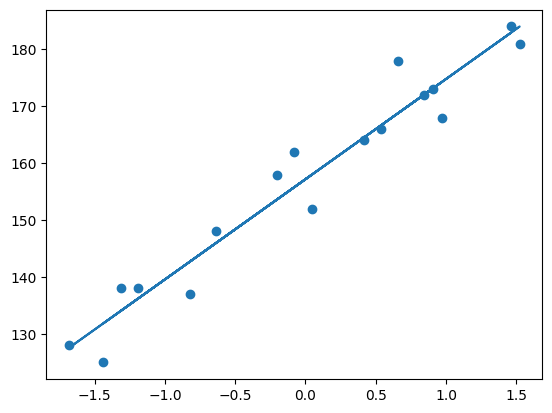

In [73]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_predict_train)

- Y_predict_train : For the best Fit Line
- Y_predict_test : For the Model evaluation, like performance Metrics

In [71]:
## Predictions for TEst Data
Y_predict_test = regression.predict(X_test)
print(Y_predict_test)

[163.37099068 160.11407805 128.63058935 178.56991626 150.34334018
 188.34065413]


In [74]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [75]:
mse = mean_squared_error(Y_test,Y_predict_test)
mae = mean_absolute_error(Y_test,Y_predict_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

69.62938718671418
7.595486385421604
8.344422519666306


In [76]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_predict_test)
print(score)

0.819988657901493


In [77]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7749858223768662

In [78]:

import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2004
Date:                Sat, 14 Jun 2025   Prob (F-statistic):                       0.660
Time:                        07:51:13   Log-Likelihood:                         -110.10
No. Observations:                  17   AIC:                                      222.2
Df Residuals:                      16   BIC:                                      223.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

e:\Krish Naik\PY_ML_NLP\FeatureEngineering\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
